# Portfolio optimization


### Importing needed libraries.

In [2]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
# matplotlib inline

### Getting stock data
I have chosen five stocks from Nasdaq Helsinki for this portfolio. The stocks are
* Neste Oyj 
* Sampo Oyj
* Sanoma Corporation
* Kemira Oyj
* Nokia Corporation

The stock data I take from Yahoo and I look the stocks adjusted closing prices, because the interest in portfolio optimization lies on returns from stocks not on actual price data. 

In [3]:
tickers = {'NESTE.HE', 'SAMPO.HE', 'SAA1V.HE', 'KEMIRA.HE', 'NOKIA.HE'}

In [11]:
stocks = pd.DataFrame()

for t in tickers:
    stocks[t] = web.DataReader(t, data_source='yahoo', start = '2010-1-1')['Adj Close']
    
stocks.columns = ['Neste', 'Sampo', 'Sanoma', 'Kemira', 'Nokia']
stocks.tail()

,Neste,Sampo,Sanoma,Kemira,Nokia
Date,,,,,
2020-08-27,44.310001,34.130001,4.2400,11.76,10.72
2020-08-28,44.799999,34.220001,4.1730,11.63,10.76
2020-08-31,44.810001,33.730000,4.0725,11.58,10.86
2020-09-01,45.099998,33.889999,3.9890,11.61,10.74
2020-09-02,46.320000,33.730000,3.9960,11.59,10.84


In [5]:
stocks.info() # checking data

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2679 entries, 2010-01-04 to 2020-09-02
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   NESTE.HE   2679 non-null   float64
 1   SAMPO.HE   2679 non-null   float64
 2   NOKIA.HE   2679 non-null   float64
 3   KEMIRA.HE  2679 non-null   float64
 4   SAA1V.HE   2679 non-null   float64
dtypes: float64(5)
memory usage: 125.6 KB


#### Let's plot normalized prices of these stocks so we can see how they have perfomed compared to each other.

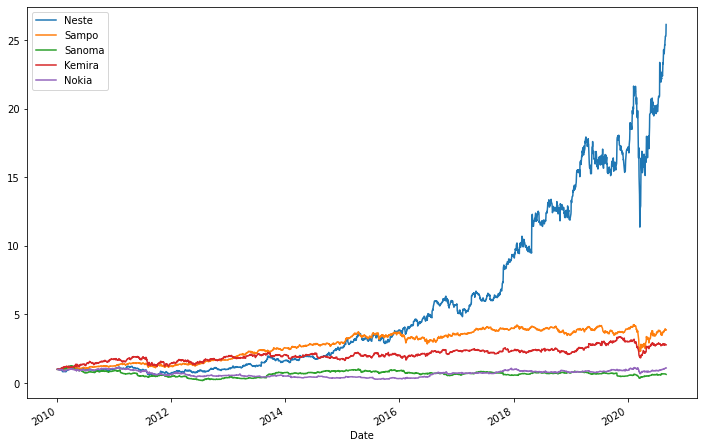

In [12]:
normalized_stocks = stocks/stocks.iloc[0]
normalized_stocks.plot(figsize =(12,8));

### Daily returns
First we calculate simple daily returns. Simple daily returns are calculated with the formula
$$r_t = \frac{p_{t}}{p_{t-1}}-1,$$
where $r_t$ is daily return at day $t$, $p_t$ is adjusted close at day $t$ and $p_{t-1}$ is adjusted close at day $t-1$.

After simple daily returns we calculate logarithmic daily returns. The formula for them is
$$ l_t = \text{ln}\big(\frac{p_{t}}{p_{t-1}}\big) $$
where $l_t$ is the logarithmic daily return and $p_t$ and $p_{t-1}$ as above.

ADD HERE TEXT WHY LOG RETURNS ARE OFTEN USED.

In [15]:
simple_daily_returns = stocks/stocks.shift(1) - 1

simple_daily_returns.head()

,Neste,Sampo,Sanoma,Kemira,Nokia
Date,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.011811,-0.001752,-0.003776,0.002830,0.002448
2010-01-07,0.016342,0.023364,0.005956,0.006585,0.003663
2010-01-08,0.017612,0.015983,-0.004306,0.022431,-0.006691
2010-01-11,-0.007524,-0.014044,-0.015135,-0.018282,-0.002449


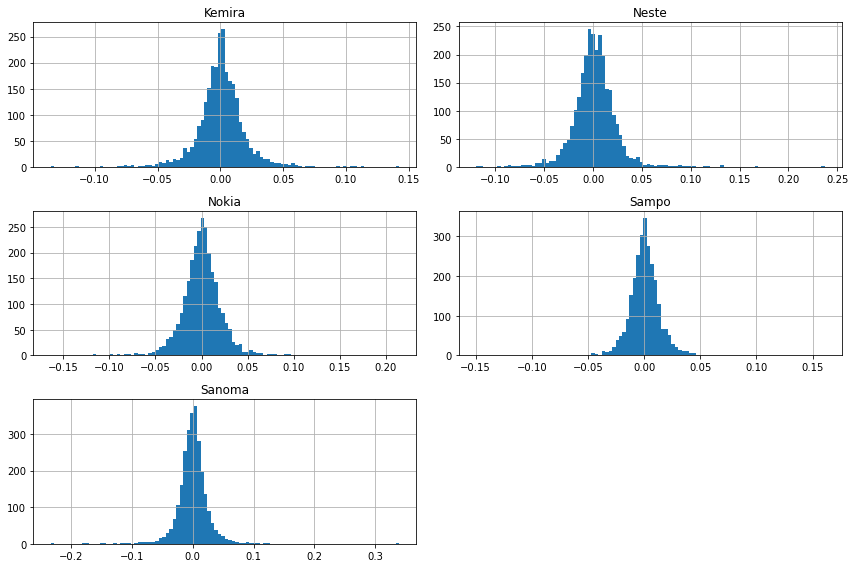

In [20]:
simple_daily_returns.hist(bins=100, figsize = (12,8))
plt.tight_layout();

In [17]:
log_returns = np.log(stocks/stocks.shift(1))
log_returns.head()

,Neste,Sampo,Sanoma,Kemira,Nokia
Date,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.011742,-0.001753,-0.003783,0.002826,0.002445
2010-01-07,0.016210,0.023096,0.005938,0.006563,0.003656
2010-01-08,0.017459,0.015857,-0.004315,0.022183,-0.006714
2010-01-11,-0.007552,-0.014143,-0.015251,-0.018451,-0.002452


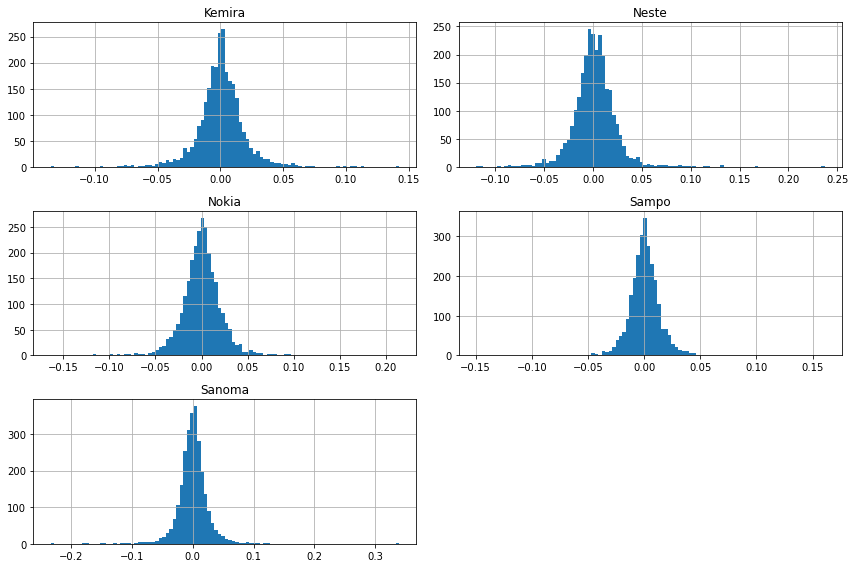

In [19]:
simple_daily_returns.hist(bins=100, figsize = (12,8))
plt.tight_layout();

It seems that there really isn't a big difference between daily returns or logarithmic daily returns.

### Making portfolio
We use Sharpe ratio to compare between portfolios. Sharpe ratio is calculated with the formula
$$
SR = \frac{R_p -R_f}{\sigma_p}, 
$$
where $SR$ stands for Sharpe Ratio, $R_p$ is portfolios return, $R_f$ is risk free return and $\sigma_p$ is the standard diviation of protfolios return and it is also called the volatility of the portfolio. A portfolio that has a bigger Sharpe Ratio is considered being better.

#### Evenly weighted portfolio

First let's make evenly weighted portfolio and see how it performs. 
* Explain Sharpe ratio cor coparing portfolios

### Optimazation of portfolio
* Use scipy.optimize package to opitmize portfolio